In [9]:
from services.load_dataset import load_data
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))
best_hp = best_hp.values

In [10]:
"""from services.modeling import *

hypermodel = LSTMHyperModel(X_train=X_train, labels=y_train, dp=True, dp_num_microbatches=1, noise_multiplier=noise_multiplier)
# Load the tuner results
tuner = kt.RandomSearch(
    hypermodel,
    objective=kt.Objective('val_recall', direction='max'),
    max_trials=10,         # Increase for a more thorough search
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='dp_credit_card_fraud_lstm'
)

tuner.search()

# Get the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_seq_length = best_hp.get('sequence_length')

# For final evaluation, generate a test set using the best sequence length.
X_train_final, y_train_final = create_sequences(X_train, y_train, best_seq_length)
X_test_final, y_test_final = create_sequences(X_test, y_test, best_seq_length)

# Apply SMOTE on the training set
n_samples, seq_len, n_features_local = X_train_final.shape
X_train_final_flat = X_train_final.reshape(n_samples, seq_len * n_features_local)
smote = SMOTE(random_state=42, sampling_strategy=0.25)
X_train_final_res, y_train_final_res = smote.fit_resample(X_train_final_flat, y_train_final)
X_train_final_res = X_train_final_res.reshape(-1, best_seq_length, n_features_local)

# Retrieve the best model and evaluate on the test set
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy, precision, recall, auc_metric = best_model.evaluate(X_test_final, y_test_final, verbose=0)
print("Best Model Evaluation on Test Set:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc_metric:.4f}")
"""

'from services.modeling import *\n\nhypermodel = LSTMHyperModel(X_train=X_train, labels=y_train, dp=True, dp_num_microbatches=1, noise_multiplier=noise_multiplier)\n# Load the tuner results\ntuner = kt.RandomSearch(\n    hypermodel,\n    objective=kt.Objective(\'val_recall\', direction=\'max\'),\n    max_trials=10,         # Increase for a more thorough search\n    executions_per_trial=1,\n    directory=\'hyperparam_tuning\',\n    project_name=\'dp_credit_card_fraud_lstm\'\n)\n\ntuner.search()\n\n# Get the best hyperparameters and model\nbest_hp = tuner.get_best_hyperparameters(num_trials=1)[0]\nbest_seq_length = best_hp.get(\'sequence_length\')\n\n# For final evaluation, generate a test set using the best sequence length.\nX_train_final, y_train_final = create_sequences(X_train, y_train, best_seq_length)\nX_test_final, y_test_final = create_sequences(X_test, y_test, best_seq_length)\n\n# Apply SMOTE on the training set\nn_samples, seq_len, n_features_local = X_train_final.shape\nX_tra

In [17]:
best_hp

{'sequence_length': 5,
 'units_lstm1': 128,
 'dropout1': 0.4,
 'units_lstm2': 32,
 'dropout2': 0.1,
 'learning_rate': 1e-05,
 'num_microbatches': 1,
 'l2_norm_clip': 1.0}

In [ ]:
from services.dp_modeling import train_model_with_delta

best_hp['num_microbatches'] = 1
best_hp['l2_norm_clip'] = 1.0
best_hp['learning_rate'] = 0.00001

delta_values = [1e-6*10**(-i) for i in range(5)]
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

results = {}

for delta in delta_values[1:]:
    print(f"δ={delta:.1e}")
    results[delta] = train_model_with_delta(delta, X_train, y_train, X_val, y_val, best_hp, target_epsilon=10.0, epochs=50, batch_size=32)
#results[delta_values[0]] = train_model_with_delta(delta_values[0], X_train, y_train, X_val, y_val, best_hp, target_epsilon=5.0, epochs=50, batch_size=32)


δ=1.0e-07
δ=1.0e-07: Using noise_multiplier=4.300 (Achieved ε=9.99)
Train shape: (195317, 5, 29)
Val shape: (50779, 5, 29)
Class balance: (array([0, 1]), array([156254,  39063], dtype=int64))
Epoch 1/50
6104/6104 [==============================] - 99s 11ms/step - loss: 0.1748 - accuracy: 0.5031 - precision: 0.1988 - recall: 0.4900 - auc: 0.4910 - val_loss: 0.1772 - val_accuracy: 0.4416 - val_precision: 0.0041 - val_recall: 0.6126 - val_auc: 0.5579
Epoch 2/50
6104/6104 [==============================] - 69s 11ms/step - loss: 0.1735 - accuracy: 0.5297 - precision: 0.2068 - recall: 0.4768 - auc: 0.4999 - val_loss: 0.1750 - val_accuracy: 0.4897 - val_precision: 0.0043 - val_recall: 0.5812 - val_auc: 0.5633
Epoch 3/50
6104/6104 [==============================] - 66s 11ms/step - loss: 0.1724 - accuracy: 0.5511 - precision: 0.2126 - recall: 0.4602 - auc: 0.5052 - val_loss: 0.1738 - val_accuracy: 0.5142 - val_precision: 0.0045 - val_recall: 0.5759 - val_auc: 0.5653
Epoch 4/50
6104/6104 [======

In [28]:
from services.modeling import create_sequences

X_train_seq, y_train_seq = create_sequences(X_train, y_train, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

Epsilon = 5.003, Delta = 1e-06


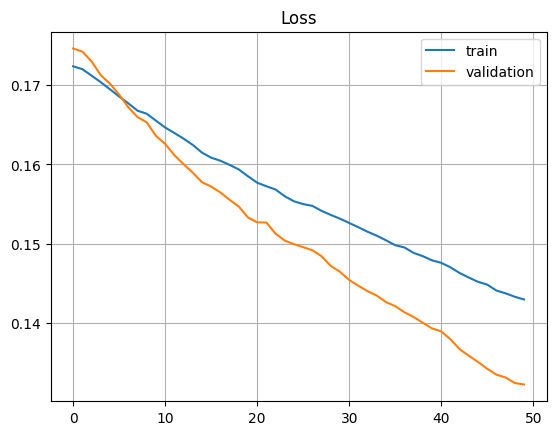

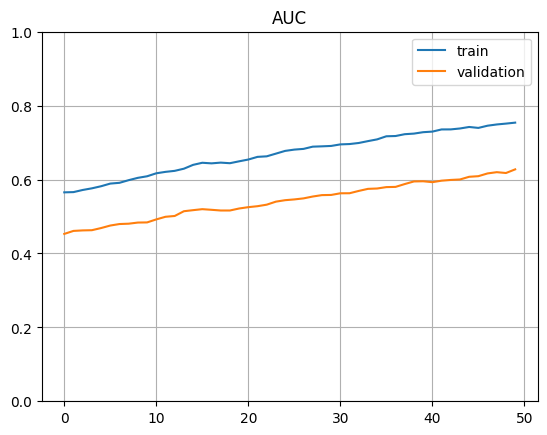

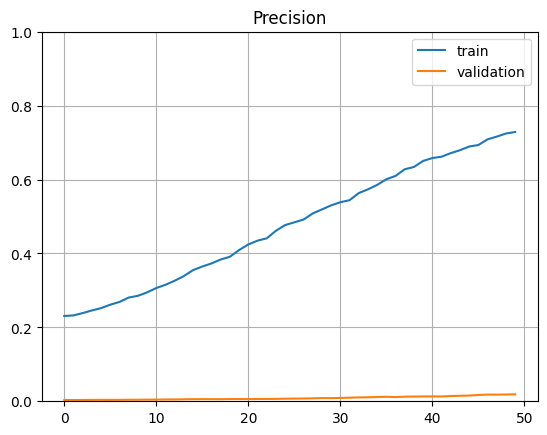

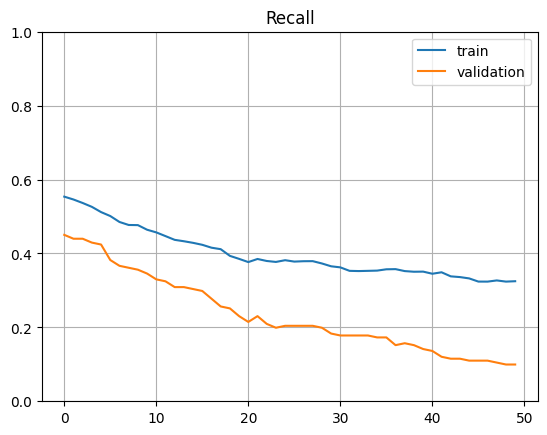

2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 9.991, Delta = 1e-07


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


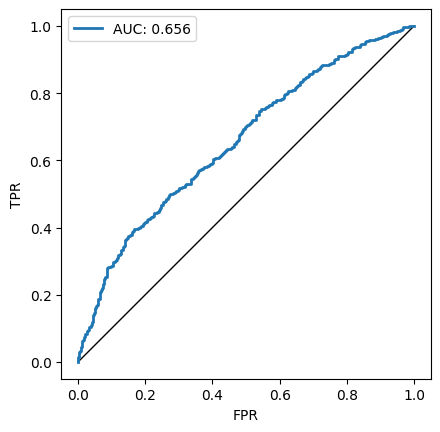

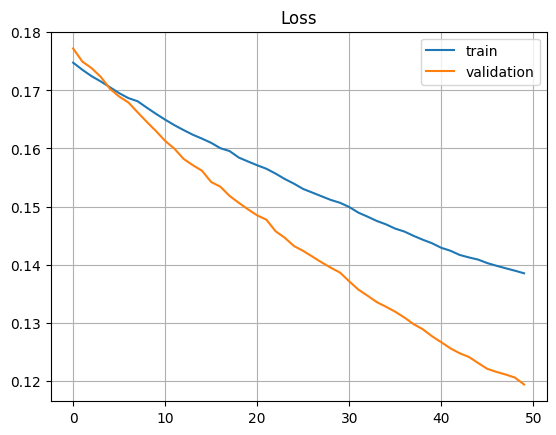

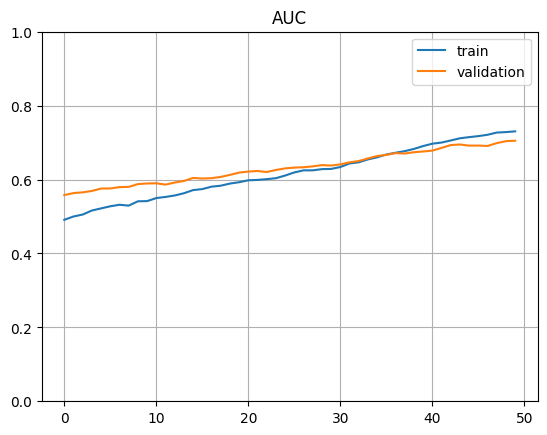

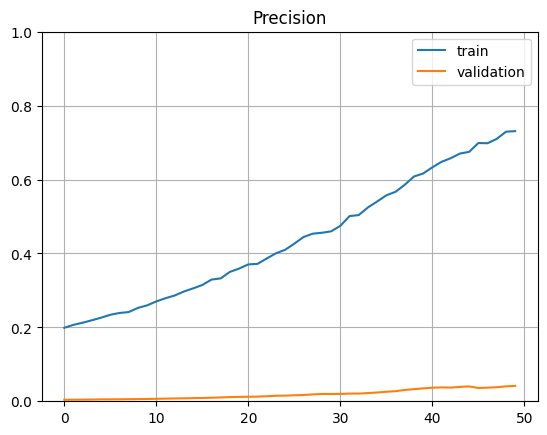

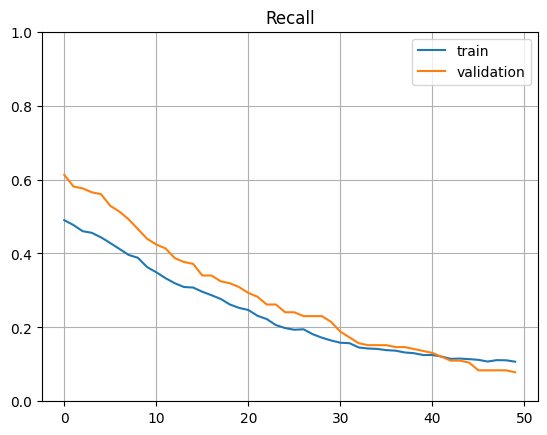

2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 9.992, Delta = 1e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


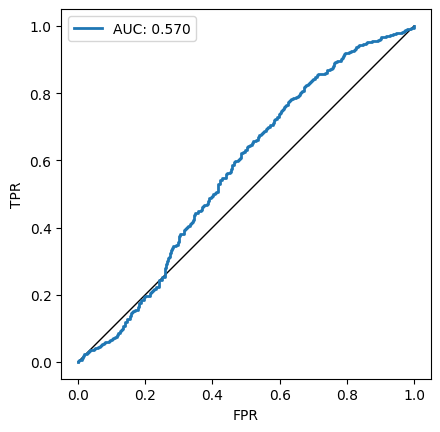

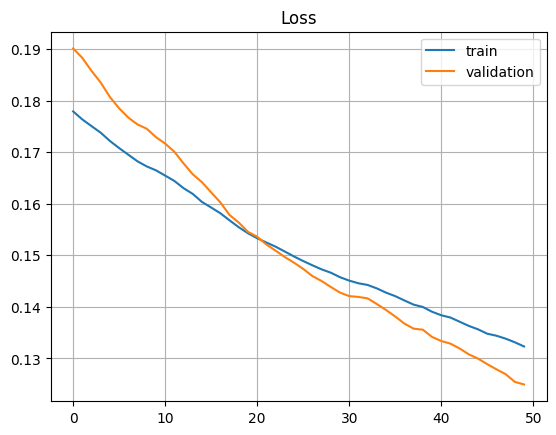

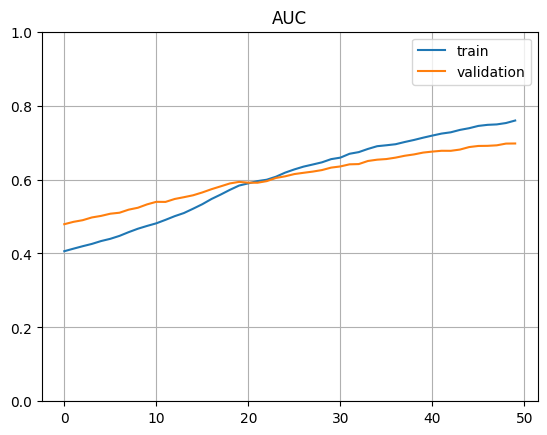

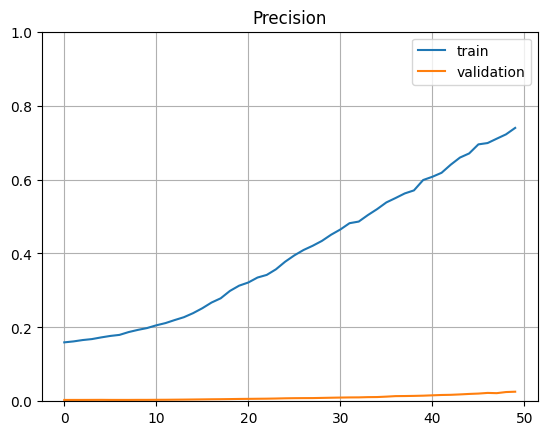

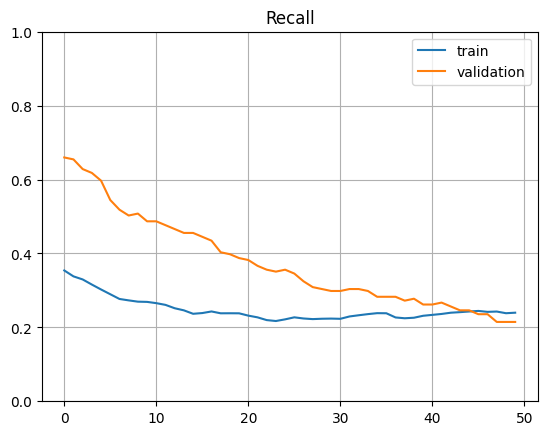

2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 9.998, Delta = 1e-09


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


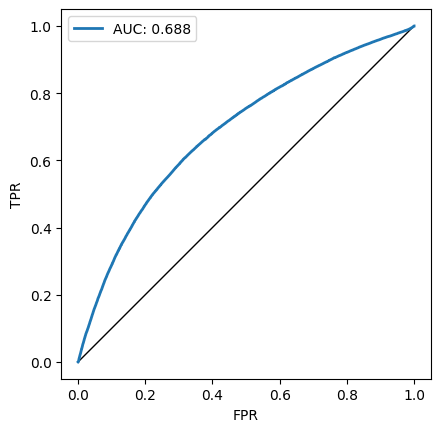

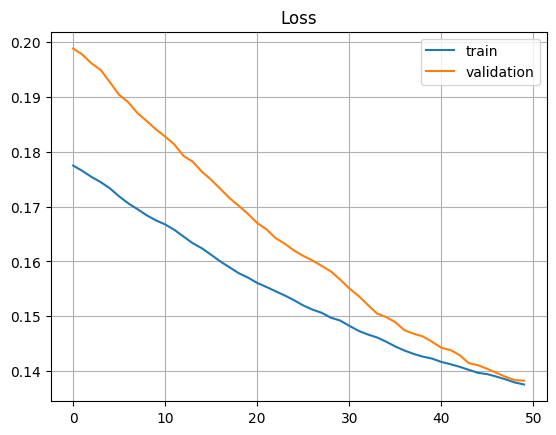

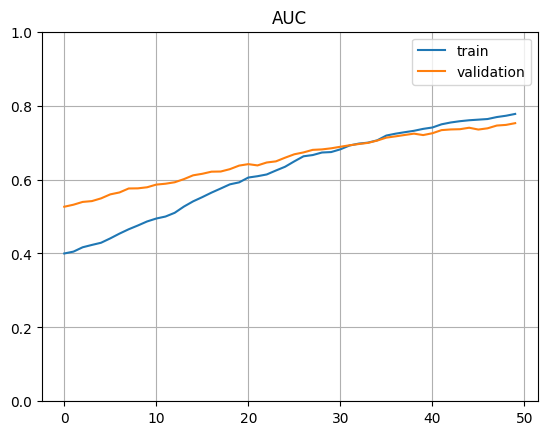

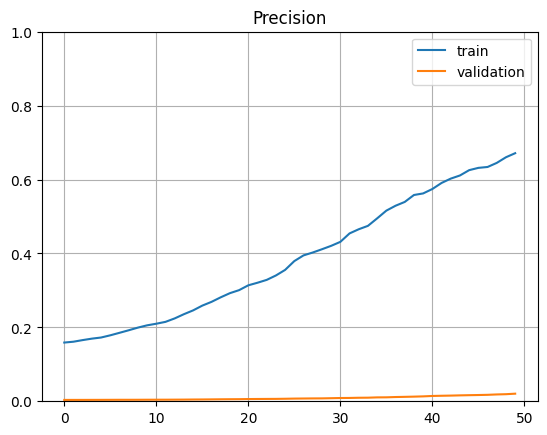

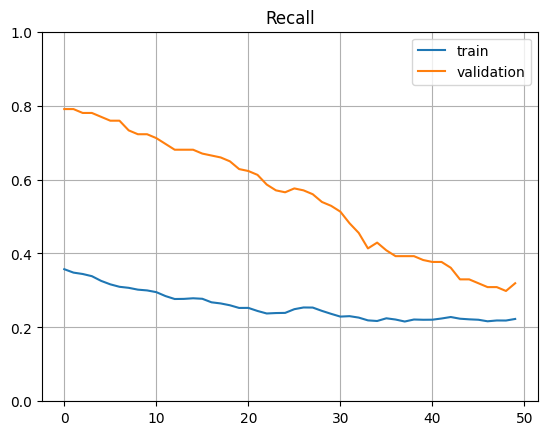

2380/2380 [==============================] - 9s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 9.996, Delta = 1e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


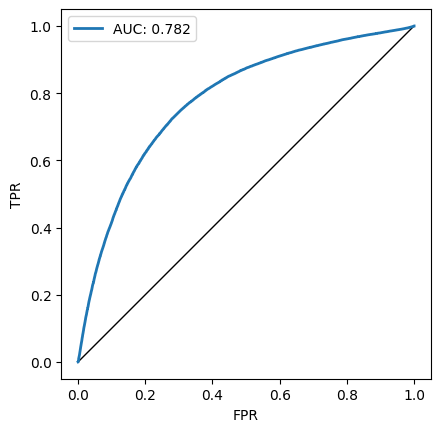

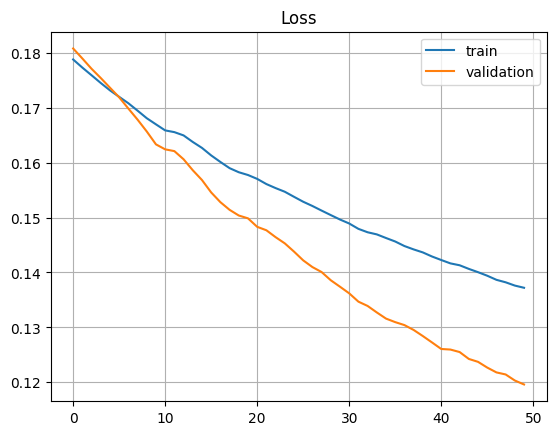

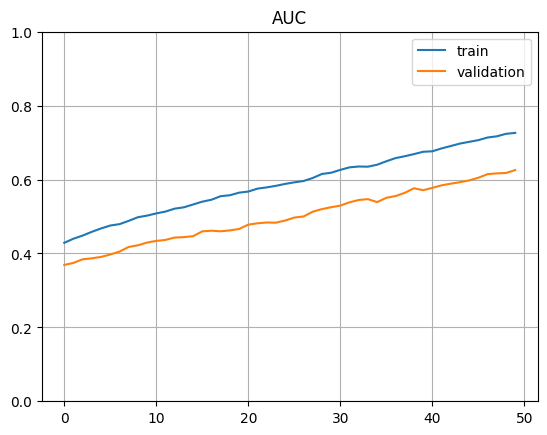

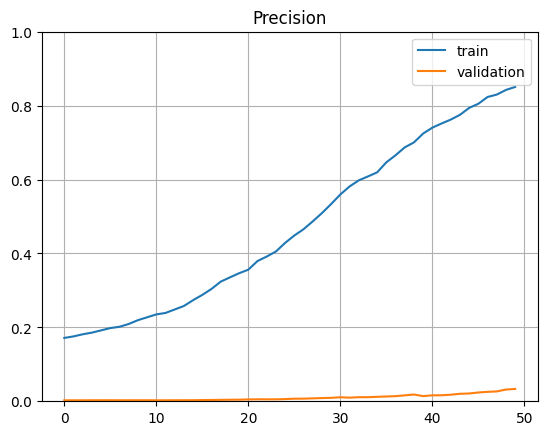

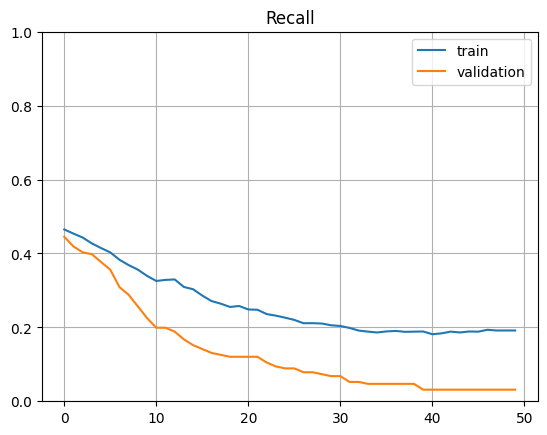

2380/2380 [==============================] - 10s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

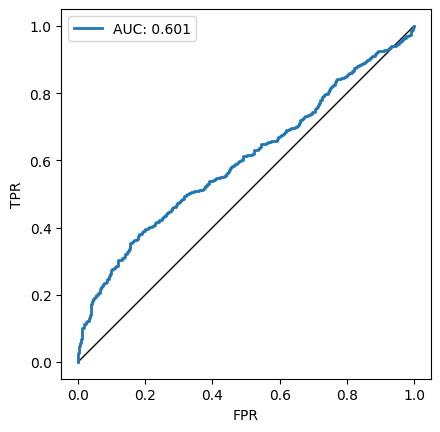

In [29]:
from services.eval_privacy import compute_mia_attacks
import matplotlib.pyplot as plt

attacks_results_list = []
figure_list = []
for delta, result in results.items():
    model = result['model']
    history = result['history']

    print(f"Epsilon = {result['epsilon']}, Delta = {delta}")
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['auc'], label='train')
    plt.plot(history.history['val_auc'], label='validation')
    plt.title('AUC')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['precision'], label='train')
    plt.plot(history.history['val_precision'], label='validation')
    plt.title('Precision')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['recall'], label='train')
    plt.plot(history.history['val_recall'], label='validation')
    plt.title('Recall')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    attacks_result, figure = compute_mia_attacks(model, X_train_seq[:X_test_seq.shape[0]], X_test_seq, y_train_seq[:X_test_seq.shape[0]], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

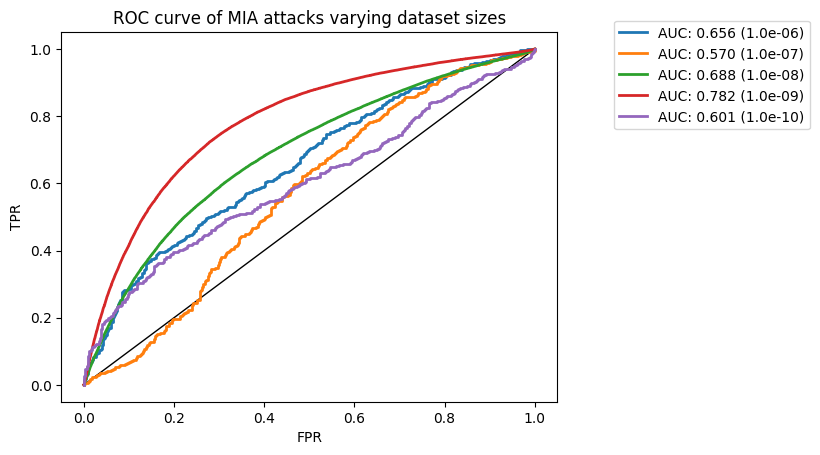

In [34]:
from sklearn import metrics

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

for delta, attack_result in zip(delta_values, attacks_results_list):
    x = attack_result.get_result_with_max_auc().roc_curve.fpr
    y = attack_result.get_result_with_max_auc().roc_curve.tpr
    plt.plot(x, y, lw=2, label=f'AUC: {metrics.auc(x, y):.3f} ({delta:.1e})')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()